In [1]:
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

In [14]:
# historical weekly data
hist_df = pd.read_csv("../data/hist_pun.csv", index_col=0, parse_dates=True)
hist_df.head()

,PUN
DateTime,
2005-01-02,27.208582
2005-01-09,49.805366
2005-01-16,74.975781
2005-01-23,66.426183
2005-01-30,62.041754


In [5]:
# year 2023
zip_url = "https://www.mercatoelettrico.org/it/MenuBiblioteca/Documenti/Anno2023.zip"
resp = urlopen(zip_url)
myzip = ZipFile(BytesIO(resp.read()))
df = pd.read_excel(myzip.open(myzip.namelist()[0]), sheet_name=1)
df = df.iloc[:, :3]
df.columns = ["Date", "Hour", "PUN"]
df['Date'] = df['Date'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Hour'], unit='h').dt.strftime('%H:%M')
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Hour'].astype(str))
df.set_index(df['DateTime'], inplace=True, drop=True)
df = df['PUN']
df = pd.DataFrame(df.resample('W').mean())
df.head()

,PUN
DateTime,
2023-01-01,193.144583
2023-01-08,180.349786
2023-01-15,168.410351
2023-01-22,167.752016
2023-01-29,179.864203


In [6]:
# problem: historical data include the same week of the first row of "new" data
hist_df.tail()

,PUN
DateTime,
2022-12-04,352.681796
2022-12-11,363.451550
2022-12-18,361.867230
2022-12-25,216.460940
2023-01-01,194.277136


In [12]:
df.iloc[0].name

Timestamp('2023-01-01 00:00:00', freq='W-SUN')

In [17]:
if hist_df.iloc[-1].name == df.iloc[0].name:
    hist_df = hist_df[:-1]
    tot_df = pd.concat([hist_df, df], axis=0)
else:
    tot_df = pd.concat([hist_df, df], axis=0)

tot_df

,PUN
DateTime,
2005-01-02,27.208582
2005-01-09,49.805366
2005-01-16,74.975781
2005-01-23,66.426183
2005-01-30,62.041754
...,...
2023-03-05,160.351095
2023-03-12,134.299114
2023-03-19,133.044032


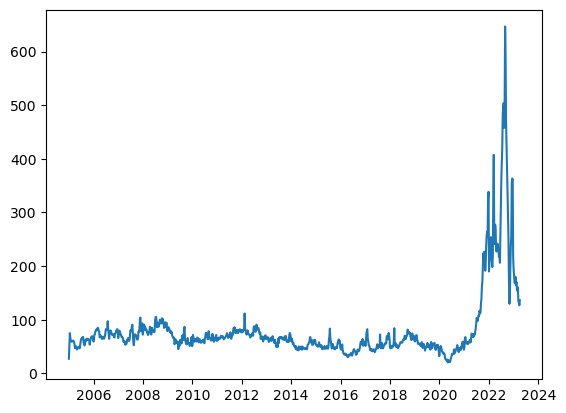

In [18]:
import matplotlib.pyplot as plt
plt.plot(tot_df)